In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_excel("./DB/5_용접불량율.xlsx", sheet_name = None)

df = data["용접불량율(1월)"]

df.head()

,프로젝트,선종,선종.1,업체구분,검사길이,불량길이,검사방법,검사자ID,과,검사실적입력일,...,용도판정,사유코드,사유코드 설명,직반장사번,직반장성명,직반장 Vendor 코드,용접사사번,용접사성명,용접완료일,용접방법
0,P31,LNG,B,Vendor,600.0,NaN,초음파,ID00000002,D1,2023-03-31,...,승인,NaN,NaN,A000002,고*선,V1,W000002,김*철,2023-02-11,FCAW
1,P31,LNG,B,Vendor,600.0,NaN,초음파,ID00000002,D1,2023-03-31,...,승인,NaN,NaN,A000002,고*선,V1,W000002,김*철,2023-02-11,FCAW
2,P31,LNG,B,Vendor,600.0,NaN,초음파,ID00000002,D1,2023-03-31,...,승인,NaN,NaN,A000002,고*선,V1,W000002,김*철,2023-02-11,FCAW
3,P31,LNG,B,Vendor,600.0,NaN,초음파,ID00000002,D1,2023-03-31,...,승인,NaN,NaN,A000002,고*선,V1,W000002,김*철,2023-02-11,FCAW
4,P31,LNG,B,Vendor,600.0,NaN,초음파,ID00000002,D1,2023-03-31,...,승인,NaN,NaN,A000002,고*선,V1,W000002,김*철,2023-02-11,FCAW


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24299 entries, 0 to 24298
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   프로젝트           24299 non-null  object        
 1   선종             24299 non-null  object        
 2   선종.1           24299 non-null  object        
 3   업체구분           24299 non-null  object        
 4   검사길이           24299 non-null  float64       
 5   불량길이           148 non-null    float64       
 6   검사방법           24299 non-null  object        
 7   검사자ID          24299 non-null  object        
 8   과              24299 non-null  object        
 9   검사실적입력일        24299 non-null  datetime64[ns]
 10  NDE업체          24299 non-null  object        
 11  용도판정           24299 non-null  object        
 12  사유코드           148 non-null    object        
 13  사유코드 설명        148 non-null    object        
 14  직반장사번          24299 non-null  object        
 15  직반장성명          2429

In [5]:
df['프로젝트'].unique()

array(['P31', 'P05', 'P13', 'P25', 'P07', 'P20', 'P01', 'P21', 'P19',
       'P06', 'P09', 'P11', 'P27', 'P10', 'P22', 'P34', 'P35', 'P38',
       'P33', 'P32', 'P16', 'P17', 'P29', 'P24', 'P30', 'P28', 'P12',
       'P14', 'P36', 'P15', 'P08', 'P18', 'P26', 'P39', 'P37', 'P02',
       'P40', 'P03', 'P04', 'P23'], dtype=object)

In [6]:
df["선종"].unique()

array(['LNG', 'COT', 'CNT'], dtype=object)

In [10]:
booldf = df[df["용도판정"] != "승인"]

In [8]:
df.columns

Index(['프로젝트', '선종', '선종.1', '업체구분', '검사길이', '불량길이', '검사방법', '검사자ID', '과',
       '검사실적입력일', 'NDE업체', '용도판정', '사유코드', '사유코드 설명', '직반장사번', '직반장성명',
       '직반장 Vendor 코드', '용접사사번', '용접사성명', '용접완료일', '용접방법'],
      dtype='object')

In [34]:
grouped = df.groupby(["프로젝트", "선종"])

df_1 = grouped['불량길이'].agg(['sum', 'mean']).sort_values(['mean'], ascending = False)

df_1.dropna()

,,sum,mean
프로젝트,선종,,
P15,CNT,15395.0,3079.000000
P03,LNG,13000.0,2166.666667
P30,LNG,7795.0,1559.000000
P26,LNG,1525.0,1525.000000
P28,CNT,2960.0,1480.000000
P21,CNT,7994.0,1142.000000
P34,CNT,960.0,960.000000
P38,LNG,1550.0,775.000000
P01,LNG,3235.0,462.142857


In [33]:
grouped = df.groupby(["용접방법"])

grouped['불량길이'].agg(['sum', 'mean', "median", "max"]).sort_values(['mean'], ascending = False)

,sum,mean,median,max
용접방법,,,,
FCSA,15746.0,1431.454545,109.0,7165.0
FCAW,56900.5,462.605691,175.0,4675.0
EGW,845.0,281.666667,325.0,405.0
SAW,910.0,113.750000,125.0,145.0
FAB,285.0,95.000000,115.0,115.0
EGFC,0.0,NaN,NaN,NaN


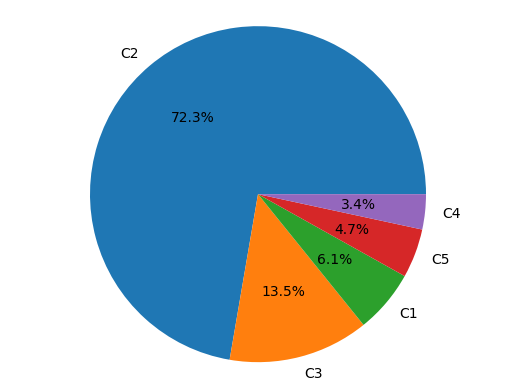

In [35]:
plt.pie(df["사유코드"].value_counts(), labels = df["사유코드"].value_counts().index, autopct = '%1.1f%%')

plt.axis('equal')

plt.show()

In [6]:
data = pd.read_excel("./DB/3_구조의장 생산설계 DP 현황_구조생설 D_P&BOM TOTAL LIST 조회(3개 호선)_설명포함.xlsx", sheet_name = None)

Cot = data['P1_COT 구조생설DP']
Stl = data['P2_STL 구조생설DP']
Cnt = data['P3_CNT 구조생설DP']

df = pd.concat([Cot, Stl, Cnt], ignore_index = True)

df

,No,프로젝트,D/P&BOM 코드,D/P&BOM 내역,설계기능,도면종류,협력사,직영책임부서,작업 출도계획,작업 출도실적
0,1,P1,DPBOM000000001,도장,F1,D1,NaN,D1,2014-07-13,2014-07-10
1,2,P1,DPBOM000000002,도장,F1,D1,NaN,D1,2014-07-13,2014-07-10
2,3,P1,DPBOM000000003,가공,F2,D2,D5,D3,2014-07-14,2014-07-09
3,4,P1,DPBOM000000004,족장,F3,D3,NaN,D4,2014-07-21,2014-06-30
4,5,P1,DPBOM000000005,공작,F2,D4,D5,D3,2014-07-21,2014-06-16
...,...,...,...,...,...,...,...,...,...,...
3065,1423,P3,DPBOM000002133,공작,F2,D4,NaN,D3,2014-10-09,2014-10-11
3066,1424,P3,DPBOM000002134,철의장,F2,D5,NaN,D3,2014-08-20,2014-08-20
3067,1425,P3,DPBOM000001232,도장,F1,D1,NaN,D1,2014-04-16,2014-07-21
3068,1426,P3,DPBOM000000789,가공,F4,D2,NaN,D3,2014-07-08,2014-07-06
